In [30]:
# ALUNO: Elioenai de Oliveira Morais
# Exercício em sala, mas não consegui fazer o gráfico corretamente

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
####################################
# Iniciando a avaliacao pelo modelo de árvore
####################################
from sklearn.tree import DecisionTreeClassifier



In [31]:
#Lendo os dados
dataset = pd.read_csv('titanic3.csv')

In [32]:
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [33]:
dataset_f = dataset.drop(["survived", "name", "sibsp", "parch", "ticket", "fare", "cabin", "embarked"],axis=1)
alvo = dataset['survived']

In [34]:
data_final = dataset_f.drop(["boat","body","home.dest"],axis=1)

In [35]:
data_final


,pclass,sex,age
0,1,female,29.00
1,1,male,0.92
2,1,female,2.00
3,1,male,30.00
4,1,female,25.00
5,1,male,48.00
6,1,female,63.00
7,1,male,39.00
8,1,female,53.00
9,1,male,71.00


In [36]:
alvo.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [37]:
data_final['sex'] = pd.get_dummies(data_final.sex)
data_final['pclass'] = pd.get_dummies(data_final.sex)

In [38]:
data_final.head()

,pclass,sex,age
0,0,1,29.00
1,1,0,0.92
2,0,1,2.00
3,1,0,30.00
4,0,1,25.00


In [48]:
# Esse data_final_novos está definido no In[40] logo abaixo.
# depois voltei aqui pra faer a divisão do treino / teste, etc.
preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(data_final_novos, alvo, test_size = 0.25, random_state=0)

## Regressão Logistica

In [40]:
modelo_reglog = LogisticRegression()

In [42]:
data_final_novos = data_final.fillna(data_final['age'].median())
data_final_novos

,pclass,sex,age
0,0,1,29.00
1,1,0,0.92
2,0,1,2.00
3,1,0,30.00
4,0,1,25.00
5,1,0,48.00
6,0,1,63.00
7,1,0,39.00
8,0,1,53.00
9,1,0,71.00


In [43]:
modelo_reglog = LogisticRegression()

In [44]:
data_final_novos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
pclass    1309 non-null uint8
sex       1309 non-null uint8
age       1309 non-null float64
dtypes: float64(1), uint8(2)
memory usage: 12.9 KB


In [45]:
alvo_treino

747     0
565     0
82      1
567     0
863     0
818     1
399     0
923     1
252     0
742     1
311     1
811     0
113     1
672     0
249     1
529     1
263     1
1158    0
1099    0
271     1
1194    0
579     0
122     1
590     1
946     0
805     1
16      0
1280    0
548     1
613     1
       ..
659     1
797     0
1286    1
1201    0
99      1
850     0
448     0
755     0
976     0
115     0
777     1
72      1
845     1
537     0
849     0
174     0
87      1
551     1
705     0
314     1
600     0
1094    1
599     0
277     1
1033    1
763     1
835     0
1216    1
559     1
684     0
Name: survived, Length: 981, dtype: int64

In [46]:
preditores_treino

,pclass,sex,age
747,1,0,0.33
565,1,0,25.00
82,0,1,36.00
567,1,0,25.00
863,1,0,28.00
818,0,1,16.00
399,1,0,42.00
923,0,1,NaN
252,1,0,61.00
742,1,0,45.00


In [49]:
modelo_reglog.fit(preditores_treino, alvo_treino)

/Users/elimorais/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
alvo_pred = modelo_reglog.predict(preditores_teste)

In [51]:
# Visualizando como a regressão fez a previsão do alvo
alvo_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,

In [52]:
#Matriz de Confusão
#A matriz mostrar 4 "quadrantes" e minha avaliação é que:
# 211 estavam previstos 211 mortes e realmente 211 morrenram
# 95 estavam previsto pra nao morrer, e 95 realmente não morreram
# 52 
print(confusion_matrix(alvo_teste, alvo_pred))

[[176  32]
 [ 41  79]]


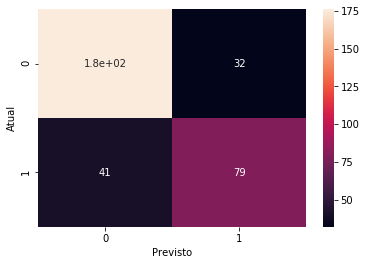

In [53]:
matriz_confusao = pd.crosstab(alvo_teste, alvo_pred, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao, annot=True)

In [54]:
# Acurácia do modelo
print('Acurácia: ', metrics.accuracy_score(alvo_teste, alvo_pred))

Acurácia:  0.7774390243902439


In [55]:
print('Precisão: ', metrics.precision_score(alvo_teste, alvo_pred))

print('Revocação: ', metrics.recall_score(alvo_teste, alvo_pred))

print('F1-Measure: ', metrics.f1_score(alvo_teste, alvo_pred))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, alvo_pred))

Precisão:  0.7117117117117117
Revocação:  0.6583333333333333
F1-Measure:  0.6839826839826839
ROC AUC:  0.7522435897435897


In [56]:
print(alvo_teste)
print(alvo_pred)

1139    0
533     1
459     0
1150    0
393     0
1189    1
5       1
231     1
330     0
887     1
531     0
790     0
427     1
1260    1
251     1
486     0
436     1
31      1
186     1
1051    0
769     0
642     0
1087    0
55      1
678     0
358     1
503     1
995     0
1005    0
1279    0
       ..
799     0
1252    0
530     0
726     0
1241    0
722     0
1257    1
688     0
308     1
1298    0
1013    0
990     0
131     1
15      0
1115    0
432     1
789     0
575     0
1092    0
187     1
191     0
103     1
970     1
60      0
692     0
364     0
494     1
708     0
646     1
1278    0
Name: survived, Length: 328, dtype: int64
[0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0

In [57]:
####################################
# Iniciando a avaliacao pelo modelo de árvore
####################################
from sklearn.tree import DecisionTreeClassifier

# Cria uma instância default
dt = DecisionTreeClassifier()

# Treina o modelo com os dados dos alunos
arvore_decisao = dt.fit(preditores_treino, alvo_treino)

In [58]:
# Realiza a previsão nos dados de teste
arvore_previsao = arvore_decisao.predict(preditores_teste)

In [59]:
print("Acurácia: ", metrics.accuracy_score(alvo_teste, arvore_previsao))

print('Precisão: ', metrics.precision_score(alvo_teste, arvore_previsao))

print('Revocação: ', metrics.recall_score(alvo_teste, arvore_previsao))

print('F1-Measure: ', metrics.f1_score(alvo_teste, arvore_previsao))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, arvore_previsao))


Acurácia:  0.7347560975609756
Precisão:  0.6701030927835051
Revocação:  0.5416666666666666
F1-Measure:  0.5990783410138248
ROC AUC:  0.6939102564102563


[[176  32]
 [ 55  65]]


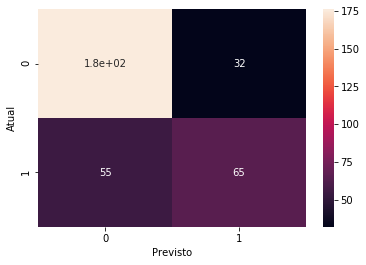

In [60]:
# Matriz de Confusão
print(confusion_matrix(alvo_teste, arvore_previsao))


matriz_confusao_arvore = pd.crosstab(alvo_teste, arvore_previsao, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_arvore, annot=True)

In [61]:
# iniciando a Floresta Aleatória
##########################

# Código para treinamento da Floresta Aleatória

from sklearn.ensemble import RandomForestClassifier 

In [62]:
# Separando a variável alvo das variáveis independentes
x = dataset.drop(["survived"],axis=1)
y = dataset["survived"]

In [63]:
# Divindo dados de treino e teste
# preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(preditores, alvo, test_size=0.30, random_state=0)log_reg = LogisticRegression()


# Dividindo o conjunto entre treino e teste
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(data_final_novos, alvo, test_size = 0.25, random_state=0)

In [64]:
# algumas funções para auxiliar na visualização:

def confusion_matrix_model(model_used):
    cm = confusion_matrix(y_test, model_used.predict(x_test))
    col = ["Previsão de Mortos","Previsão de Sobreviventes"]
    cm = pd.DataFrame(cm)
    cm.columns = ["Previsto Morto","Previsto Sobrevivente"]
    cm.index=["Realmente Morto","Realmente Sobrevivente"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [65]:
preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(data_final_novos, alvo, test_size=0.30, random_state=0)



In [66]:
preditores_treino.head()


,pclass,sex,age
501,0,1,13.0
588,0,1,4.0
402,0,1,30.0
1193,1,0,28.0
686,0,1,22.0


In [67]:
# Instanciando objeto da Floresta Aleatória e define o número de árvores a serem utilizadas
floresta = RandomForestClassifier(n_estimators=1000)

# x_train, x_test, y_train, y_test

# Treinamento do modelo
floresta.fit(preditores_treino, alvo_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
# Prevê a partir dos preditores de testes
previsao = floresta.predict(preditores_teste)

In [69]:
previsao

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

[[207  39]
 [ 54  93]]


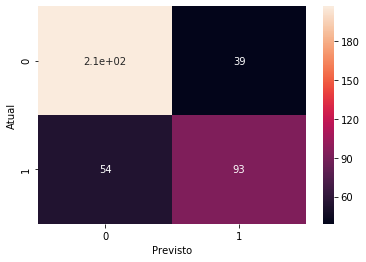

In [70]:
# Matriz de Confusão
print(confusion_matrix(alvo_teste, previsao))



matriz_confusao_arvore = pd.crosstab(alvo_teste, previsao, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_arvore, annot=True)


In [71]:
print("Acurácia: ", metrics.accuracy_score(alvo_teste, previsao))

print('Precisão: ', metrics.precision_score(alvo_teste, previsao))

print('Revocação: ', metrics.recall_score(alvo_teste, previsao))

print('F1-Measure: ', metrics.f1_score(alvo_teste, previsao))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, previsao))


Acurácia:  0.7633587786259542
Precisão:  0.7045454545454546
Revocação:  0.6326530612244898
F1-Measure:  0.6666666666666666
ROC AUC:  0.737058237929318


In [72]:
print('Acurácia: ', metrics.accuracy_score(alvo_teste, previsao))

Acurácia:  0.7633587786259542


In [73]:
# Dividindo o conjunto entre treino e teste
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
# preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(data_final_novos, alvo, test_size = 0.25, random_state=0)

In [74]:
# algumas funções para auxiliar na visualização:

def confusion_matrix_model(model_used):
    cm = confusion_matrix(y_test, model_used.predict(x_test))
    col = ["Previsto Morto","Previsto Sobrevivente"]
    cm = pd.DataFrame(cm)
    cm.columns = ["Previsto Morto","Previsto Sobrevivente"]
    cm.index=["Realmente Morto","Realmente Sobrevivente"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [75]:
log_reg = LogisticRegression()

log_reg = log_reg.fit(preditores_treino, alvo_treino)

log_reg

/Users/elimorais/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
# Coeficientes relativos as variáveis independentes/preditoras
print('Coeficientes: \n', log_reg.coef_)


print('Intercepto: \n', log_reg.intercept_)

Coeficientes: 
 [[-1.30002991e+00  1.12153037e+00  9.14412630e-04]]
Intercepto: 
 [-0.17849955]


In [99]:
# Calcula o "False Positive Rate" e o "True Positive Rate"
fpr, tpr, thresholds = metrics.roc_curve(alvo_teste, previsao, pos_label=1)

AUC1 = metrics.auc(fpr, tpr)

In [100]:
print('Área abaixo da curva: ', AUC1)

Área abaixo da curva:  0.737058237929318


In [101]:
# Código para treinamento da Floresta Aleatória

from sklearn.ensemble import RandomForestClassifier 

In [102]:
# Instanciando objeto da Floresta Aleatória e define o número de árvores a serem utilizadas
floresta = RandomForestClassifier(n_estimators=1000)

In [103]:
# x_train, x_test, y_train, y_test

# Treinamento do modelo
floresta.fit(preditores_treino, alvo_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
#predicted = floresta.predict(x_test)
#predicted = floresta.predict(alvo_treino)

In [105]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
# preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(data_final_novos, alvo, test_size = 0.25, random_state=0)


In [106]:
predicted = floresta.predict(preditores_teste)

In [107]:
predicted

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

[[208  38]
 [ 55  92]]


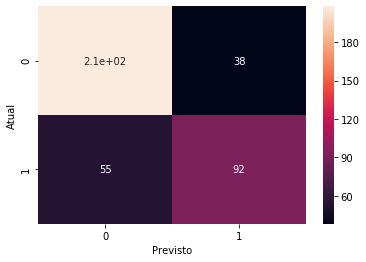

In [108]:
# Matriz de Confusão
print(confusion_matrix(alvo_teste, predicted))



matriz_confusao_floresta = pd.crosstab(alvo_teste, predicted, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_floresta, annot=True)

In [116]:
print("Acurácia: ", metrics.accuracy_score(alvo_teste, predicted))

print('Precisão: ', metrics.precision_score(alvo_teste, predicted))

print('Revocação: ', metrics.recall_score(alvo_teste, predicted))

print('F1-Measure: ', metrics.f1_score(alvo_teste, predicted))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, predicted))




Acurácia:  0.7633587786259542
Precisão:  0.7076923076923077
Revocação:  0.6258503401360545
F1-Measure:  0.664259927797834
ROC AUC:  0.7356893977103035


In [110]:
# Calcula o "False Positive Rate" e o "True Positive Rate"
fpr, tpr, thresholds = metrics.roc_curve(alvo_teste, predicted, pos_label=1)

AUC = metrics.auc(fpr, tpr)

In [111]:
print('Área abaixo da curva: ', AUC)

Área abaixo da curva:  0.7356893977103035


In [112]:
# Criando a função do plot 'Falso Positivo' X 'Verdadeiro Positivo'
def plot_roc_curve(fper, tper, title):
    plt.plot(fper, tper, color='orange', label='Gráfico ROC')
    plt.plt([0,1], [0,1], color='darkblue', linestyles='--')
    plt.xlabel('Taxa Falso Positivo')
    plt.ylabel('Taxa Verdadeiro Positivo')
    plt.title(title)
    plt.legend()
    plt.show()

In [113]:
# Criando a função do gráfico ROC curve 'Falso Positivo' X 'Verdadeiro Positivo'
# para usar comparando árvore, com floresta, com Regressão Logística e tudo que tem direito
def plot_roc_curves(fper1, tper1, title1, fper2, tper2, title2, fper3, tper3, title3):
    plt.plot(fper1, tper1, color='orange', label=title1)
    plt.plot(fper2, tper2, color='green', label=title2)
    plt.plot(fper3, tper3, color='red', label=title3)
    plt.plt([0,1], [0,1], color='darkblue', linestyles='--')
    plt.xlabel('Taxa Falso Positivo')
    plt.ylabel('Taxa Verdadeiro Positivo')
    plt.title("ROC curve")
    plt.legend()
    plt.show()

In [118]:
probs = floresta.predict_proba(preditores_teste)
probs = probs[:, 1]
fper1, tper1, thresholds = metrics.roc_curve(alvo_teste, probs)
roc_auc1=metrics.auc(fper1, tper1)
print("AUC=", roc_auc1)

AUC= 0.7743072838891655


In [120]:
probs = dt.predict_proba(preditores_teste)
probs = probs[:, 1]
fper3, tper3, threshouds3=metrics.roc_curve(alvo_teste, probs)
roc_auc3=metrics.auc(fper3, tper3)
print("AUC= ", roc_auc3)


AUC=  0.7543139206902274


In [125]:
import matplotlib
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (328,) and (393, 3)

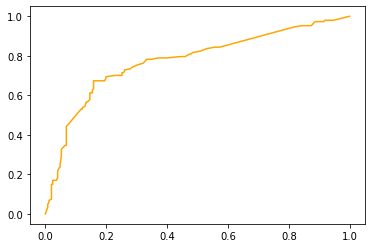

In [127]:
plot_roc_curves(fper1, tper1, 'Floresta', alvo_pred, preditores_teste, 'Logística', fper3, tper3, 'Árvore')